In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-basics-first)

The `OrdinaryDiffEq` package offers solvers for IVPs. Let's use it to define and solve an initial-value problem for $u'=\sin[(u+t)^2]$ over $t \in [0,4]$, such that $u(0)=-1$.

Because many practical problems come with parameters that are fixed within an instance but varied from one instance to another, the syntax for IVPs includes a input argument `p` that stays fixed throughout the solution. Here we don't want to use that argument, but it must be in the definition for the solver to work.
```{tip}
:class: dropdown
To create an initial-value problem for $u(t)$, you must supply a function that computes $u'$, an initial value for $u$, and the endpoints of the interval for $t$. The $t$ interval should be defined as `(a,b)`, where at least one of the values is a float.
```

```{index} ! Julia; ODEProblem, ! Julia; solve
```

In [2]:
f(u, p, t) = sin((t + u)^2)     # defines du/dt, must include p argument
u₀ = -1.0                       # initial value
tspan = (0.0, 4.0)               # t interval

(0.0, 4.0)

With the data above we define an IVP problem object and then solve it. Here we tell the solver to use the `Tsit5` method, which is a good first choice for most problems.

In [3]:
using OrdinaryDiffEq
ivp = ODEProblem(f, u₀, tspan)
sol = solve(ivp, Tsit5());

The resulting solution object can be shown using `plot`.

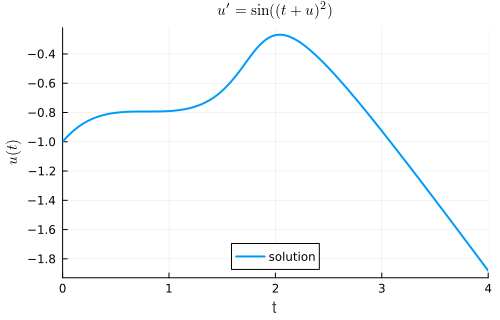

In [4]:
using Plots
plot(sol;
    label="solution", legend=:bottom,
    xlabel="t",  ylabel=L"u(t)",
    title=L"u'=\sin((t+u)^2)")

The solution also acts like any callable function that can be evaluated at different values of $t$.

In [5]:
@show sol(1.0);

sol(1.0) = -0.7903205813665345

Under the hood, the solution object holds some information about how the values and plot are produced:

In [6]:
[sol.t sol.u]

15×2 Matrix{Float64}:
 0.0        -1.0
 0.0867807  -0.93483
 0.241035   -0.856617
 0.464665   -0.805668
 0.696832   -0.793614
 1.00862    -0.789925
 1.37461    -0.718601
 1.70407    -0.476837
 1.93572    -0.29033
 2.17184    -0.294994
 2.4843     -0.483948
 2.69425    -0.654121
 3.27049    -1.1783
 3.62534    -1.51729
 4.0        -1.88086

The solver initially finds approximate values of the solution (second column above) at some automatically chosen times (first column above). To compute the solution at other times, the object performs an interpolation on those values. This chapter is about how the discrete $t$ and $u$ values are computed. For now, just note how we can extract them from the solution object.

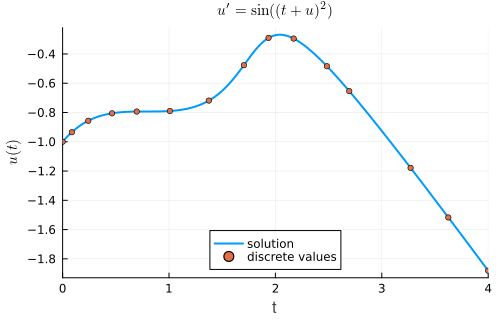

In [7]:
scatter!(sol.t, sol.u, label="discrete values")